#### Text Mining vs NLP
- Text Mining : 비정형 데이터에서 의미 있는 정보를 추출하는 방법
- NLP(자연어 처리) : 사람이 사용하는 언어를 이해하고 예측하는 분야


#### Text Mining 분야
- 문서분류 : 틀정 카테고리에 text가 속하는지 예측하는 분야
- 문서요약 : text의 주요 내용을 추리는 분야
- 문서 군집 분석 : 문서끼리의 유사도를 비교 분석하는 분야
- 감정 분석 : text에 들어있는 감정이나 의도를 분석하는 분야

#### Text Mining process
1. 텍스트 전처리
    - 클랜징
    - 불용어 처리
    - 어근추출
        - 영어 : NLTK
        - 한국어 : Konlpy(형태소 분류기)
    - 토큰화 : text 데이터를 일정 단위로 분해하는 작업

2. 수치화, 피쳐 백터화
    - 원핫인코딩, 라벨인코딩
    - BOW(단순 빈도 수), TF-IDF(문서 출현 빈도 기반 공식) : 빈도 기반의 수치화
    - Word Embedding(워드 임베딩)

3. ML/DL학습 -> 예측 -> 평가



In [1]:
# 데이터 로딩 - 한국어 혐오표현 데이터
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv("./ml_data/unsmile_train_v1.0.tsv",delimiter="\t")
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


In [4]:
test = pd.read_csv("./ml_data/unsmile_valid_v1.0.tsv",delimiter="\t")
test.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,0
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0


#### 단어빈도 분석
- WordCount : 단어의 빈도(개수)를 측정

### 토큰화의 종류
- 토큰화를 진행하는 이유
    : 일상적으로 사용하는 자연어를 컴퓨터가 이해할 수 있게 변경하기 위함

In [5]:
text_train = train["문장"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#토큰화 작업
#띄어쓰기를 중심으로 모든 문장을 쪼개보자!
tmp = [doc.split(" ") for doc in text_train]

In [8]:
tmp

[['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까'],
 ['아동성범죄와',
  '페도버는',
  '기록바',
  '끊어져',
  '영원히',
  '고통',
  '받는다.',
  '무슬림',
  '50퍼',
  '근친이다.',
  '10',
  '16까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험은',
  '400%',
  '다.'],
 ['루나',
  '솔로앨범',
  '나왔을',
  '때부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  'Keep',
  'o',
  '',
  'doin',
  '진짜',
  '띵곡임',
  '꼭',
  '들어보셈"'],
 ['홍팍에도',
  '어버이연합인가',
  '보내요',
  '뭐',
  '이런뎃글',
  '있는데',
  '이거',
  '어버이연합측에',
  '신고하면',
  '그쪽에서',
  '고소',
  '가능하냐?'],
 ['아놔',
  '왜',
  '여기',
  '댓들은',
  '다',
  '여자들이',
  '김치녀라고',
  '먼저',
  '불렸다!',
  '여자들은',
  '더',
  '심하게',
  '그런다!',
  '이렇게',
  '2개로',
  '싸우냐..',
  '내가',
  '볼',
  '땐',
  '둘다',
  '나쁜',
  '말',
  '그',
  '이상도',
  '이하도',
  '아닌데'],
 ['고향가서',
  '피방가면',
  '동네',
  '부럴',
  '친구들이랑은',
  '뭐',
  '거르는',
  '거',
  '없이',
  '이야기하니까',
  '막',
  '말하게',
  '되더라',
  '당연히',
  '키보드를',
  '치거나',
  '그러지는',
  '않는데',
  '말하는게',
  '많이',
  '거칠어지긴',
  '해',
  '반성해야겠네'],
 ['예수',
  '십새끼',
  '개새끼',
  '창녀아들',
  '애비실종',
  '가정교육',
  '못받은',
  '무뇌충',
  '허언증',
  '정신병자',
  '사기꾼

In [9]:
token_list = []
for s in tmp:
    token_list += s

In [10]:
token_list

['일안하는',
 '시간은',
 '쉬고싶어서',
 '그런게',
 '아닐까',
 '아동성범죄와',
 '페도버는',
 '기록바',
 '끊어져',
 '영원히',
 '고통',
 '받는다.',
 '무슬림',
 '50퍼',
 '근친이다.',
 '10',
 '16까지',
 'IQ',
 '떨어지고',
 '출산',
 '위험은',
 '400%',
 '다.',
 '루나',
 '솔로앨범',
 '나왔을',
 '때부터',
 '머모',
 '기운',
 '있었음',
 'ㅇㅇ',
 'Keep',
 'o',
 '',
 'doin',
 '진짜',
 '띵곡임',
 '꼭',
 '들어보셈"',
 '홍팍에도',
 '어버이연합인가',
 '보내요',
 '뭐',
 '이런뎃글',
 '있는데',
 '이거',
 '어버이연합측에',
 '신고하면',
 '그쪽에서',
 '고소',
 '가능하냐?',
 '아놔',
 '왜',
 '여기',
 '댓들은',
 '다',
 '여자들이',
 '김치녀라고',
 '먼저',
 '불렸다!',
 '여자들은',
 '더',
 '심하게',
 '그런다!',
 '이렇게',
 '2개로',
 '싸우냐..',
 '내가',
 '볼',
 '땐',
 '둘다',
 '나쁜',
 '말',
 '그',
 '이상도',
 '이하도',
 '아닌데',
 '고향가서',
 '피방가면',
 '동네',
 '부럴',
 '친구들이랑은',
 '뭐',
 '거르는',
 '거',
 '없이',
 '이야기하니까',
 '막',
 '말하게',
 '되더라',
 '당연히',
 '키보드를',
 '치거나',
 '그러지는',
 '않는데',
 '말하는게',
 '많이',
 '거칠어지긴',
 '해',
 '반성해야겠네',
 '예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '나이쳐먹고',
 '피시방가는',
 '놈들은',
 '대가리에',


In [11]:
#토큰 개수 세기
from collections import Counter

In [12]:
counter = Counter(token_list)
type(counter)

collections.Counter

In [13]:
counter.most_common(40)

[('다', 661),
 ('왜', 518),
 ('진짜', 514),
 ('ㅋㅋ', 401),
 ('존나', 370),
 ('더', 365),
 ('그냥', 357),
 ('ㅋㅋㅋ', 340),
 ('좀', 261),
 ('이', 243),
 ('그', 236),
 ('저', 234),
 ('씨발', 226),
 ('근데', 223),
 ('시발', 219),
 ('ㅋㅋㅋㅋ', 217),
 ('안', 177),
 ('하는', 171),
 ('난', 170),
 ('수', 169),
 ('새끼들', 166),
 ('저런', 165),
 ('또', 154),
 ('무슨', 153),
 ('아니라', 146),
 ('내가', 145),
 ('하고', 145),
 ('', 141),
 ('있는', 140),
 ('전라도', 139),
 ('ㄹㅇ', 138),
 ('너무', 136),
 ('잘', 134),
 ('뭐', 132),
 ('이런', 132),
 ('이기야', 128),
 ('여자', 125),
 ('ㅋ', 125),
 ('ㅋㅋㅋㅋㅋ', 124),
 ('보면', 123)]

#### 혐오표현 카테고리 중 한가지를 선택해 단어 빈도 분석 진행

In [14]:
train

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0


In [15]:
ht_race_national = train[train["인종/국적"] ==1]

In [16]:
# 문장 인덱싱
# 토큰화
tmp_race = ht_race_national["문장"]
tmp_ra_na = [doc.split(" ") for doc in tmp_race]

In [17]:
ra_na = []
for i in tmp_ra_na:
    ra_na+=i

In [18]:
ra_count = Counter(ra_na)
ra_count.most_common(40)

[('다', 94),
 ('존나', 85),
 ('진짜', 72),
 ('조선족', 68),
 ('왜', 68),
 ('새끼들', 62),
 ('더', 53),
 ('시발', 49),
 ('ㅋㅋ', 47),
 ('씨발', 47),
 ('ㅋㅋㅋ', 46),
 ('그냥', 43),
 ('중국', 41),
 ('이슬람', 38),
 ('개슬람', 37),
 ('짱깨', 37),
 ('그', 34),
 ('좀', 34),
 ('좆족', 34),
 ('ㅋㅋㅋㅋ', 33),
 ('난민', 32),
 ('무슬림', 30),
 ('근데', 28),
 ('똥남아', 28),
 ('저', 27),
 ('다문화', 25),
 ('하는', 25),
 ('ㄹㅇ', 25),
 ('동남아', 24),
 ('걍', 23),
 ('나라', 23),
 ('새끼들이', 23),
 ('뭐', 22),
 ('아니라', 22),
 ('=', 22),
 ('이', 22),
 ('새끼들은', 22),
 ('제발', 22),
 ('무슨', 21),
 ('한국에', 21)]

In [19]:
# 워드클라우드
#!pip install wordcloud

In [20]:
from wordcloud import WordCloud #워드클라우드 클래스


In [21]:
wc = WordCloud(background_color="white", # 배경 색상 지정
               font_path= "C:\\Windows\\Fonts\\malgun.ttf", # 한글이 가능한 폰트 지정
               random_state=425) # 난수 고정

In [22]:
#워드 클라우드 생성
input_str = " ".join(ra_na)
result_wc = wc.generate_from_text(input_str)

In [23]:
import matplotlib.pyplot as plt

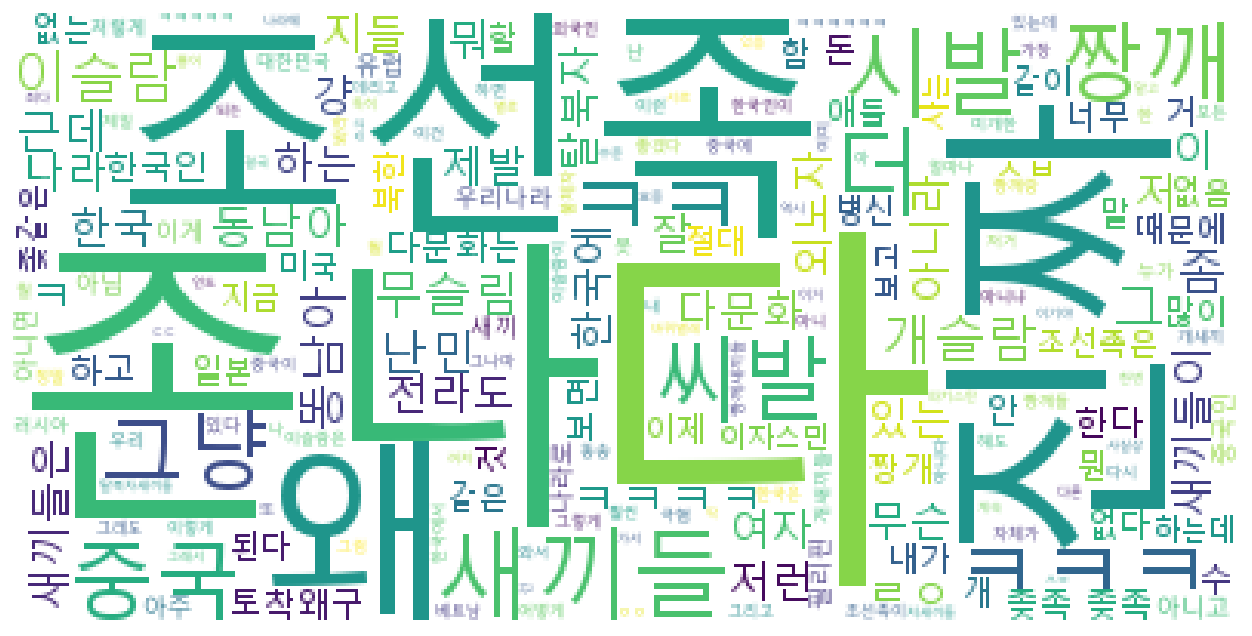

In [24]:
plt.figure(figsize=(20,8))
plt.imshow(result_wc)

plt.axis("off")
plt.show()

#### 데이터클랜징
- 한 글자 단어 삭제/텍스트 마이닝에서 의미 부여가 어려움
- ㅋㅋㅋ, ㅎㅎㅎ 같은 반복적인 글자 삭제

In [25]:
import re #정규 표현식
# 정규표현식 : 프로그래밍에서 문자열을 다룰 때, 문자열의 일정한 패턴을 표현하는 형식 언어


In [26]:
# 패턴 생성
p = re.compile("[ㅋㅎㄷ~ㅡ>!?^]+")

In [27]:
clean_text = []

for token in ra_na:
    if len(token) < 2: # 한글자인지 검사
        continue #1글자인경우 반복구절로 올라가기

    if p.match(token): #정규표현식 패턴에 매칭되는지 검사
        continue

    clean_text.append(token)

        


In [28]:
clean_text

['예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '이슬람뺨치내',
 '갓슬람',
 '정희구현',
 '테러',
 'ㅅㅅㅅㅅ미제양키새끼들에게는',
 '테러가',
 '답이다좆같은',
 '양키',
 '씨발새끼들',
 '진짜',
 '저것들',
 '아주',
 '싫다,',
 '싫어.',
 '내가',
 '외국년놈들에게',
 '욕질',
 '괜히',
 '해대는',
 '아니다.',
 '이런',
 '기사',
 '한국에서도',
 '곧나오겠노',
 '개슬람',
 '난민',
 '많아지더만',
 '다문화',
 '극혐',
 '맞고',
 '다인종도',
 '위험하긴',
 '한데어차피',
 '일베서',
 '아무리',
 '극혐씹극혐',
 '소리',
 '해봤자',
 '변하는거',
 '없음',
 '존나',
 '뭉쳐서',
 '시위해야',
 '윗대가리들이',
 '들을랑말랑하는데',
 '우리',
 '일베충들이',
 '그럴',
 '위인들이',
 '얼마나',
 '있을까?그냥',
 '글러먹었다',
 '생각하고',
 '자기살길이나',
 '찾으면',
 '된다',
 '백인은',
 '애를',
 '안낳으니',
 '기독교가',
 '줄은거고',
 '이슬람은',
 '애를',
 '많이',
 '낳고',
 '불법이민',
 '존나가니',
 '늘어나고',
 '조선족',
 '개새끼들',
 '백린탄으로',
 '멸해야한다',
 '다문화는',
 '그종족의',
 '문화를',
 '존중하고',
 '지속시키며',
 '같이',
 '행복하게',
 '사는건대',
 '이나라는',
 '짬뽕이네',
 '시부랄거',
 '개소리하노',
 '시발라마',
 '조선족이',
 '중국인인데',
 '중국인보다라니',
 '개소리야',
 '조선족',
 '==',
 '중국인',
 '동일',
 '어제',
 '날이냐?',
 '어제',
 '쓰까국'

In [29]:
input_str = " ".join(clean_text)

In [30]:
result_wc = wc.generate_from_text(input_str)

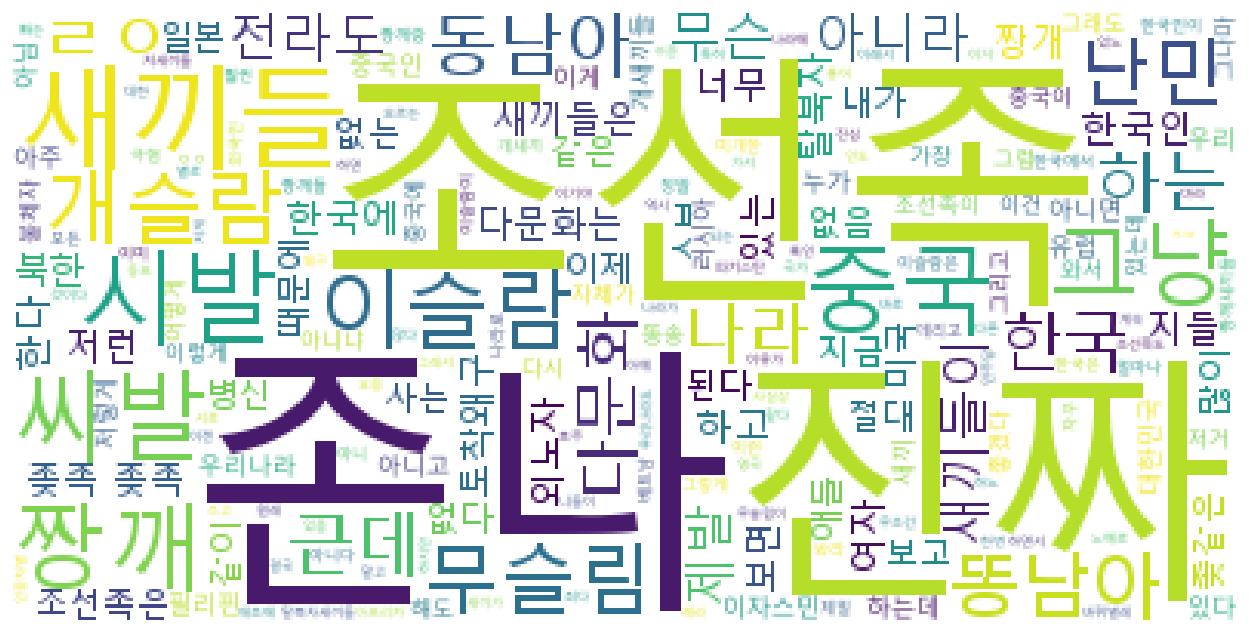

In [31]:
plt.figure(figsize=(20,8))
plt.imshow(result_wc)

plt.axis("off")
plt.show()

#### 감성분석
- 혐오표현 : 0, 악플 욕설 : 1, clean :2

In [32]:
train["혐오표현"] = train.loc[:,"여성/가족":"기타 혐오"].sum(axis=1)

In [33]:
train

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0,1
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0,2
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
train2 = train[["문장","악플/욕설","clean","혐오표현"]]

In [35]:
train2

,문장,악플/욕설,clean,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,0,0,1
...,...,...,...,...
15000,께롱께롱께롱!!!,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,1
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,0,0,2
15003,링크도 안박고 가서 글 쓰자고 선동하네,1,0,0


In [36]:
# 정답 라벨링을 위한 사용자 정의 함수
def label(data):
    if data["혐오표현"] > 0:
        return 0
    elif data["악플/욕설"] > 0:
        return 1
    else:
        return 2

In [37]:
y_train = train2.apply(label,axis=1)
# 0 : 혐오표현
# 1 : 악플/욕설
# 2 : clean

In [38]:
y_train.value_counts()

0    8121
2    3741
1    3143
Name: count, dtype: int64

In [39]:
test

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,0
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3732,저게 시대적언어면 한남충도 시대적언어 아니노 ㅋㅋ,0,1,0,0,0,0,0,0,0,0,0
3733,다른것보다 눈이 어떻게 저렇게 생기노.탄식.,0,0,0,0,0,0,0,0,1,0,0
3734,막노동을 해도 한국에살고말지 미쳤다고 남미를가냐?차라리 자살을하겠다.,0,0,0,1,0,0,0,0,0,0,0
3735,‘사형을 구형하였으나 여성인 점을 감안해 25년 선고’ ???내가 뭐 잘못본건가?개...,1,0,0,0,0,0,0,0,0,0,0


In [40]:
test["혐오표현"] = test.loc[:,"여성/가족":"기타 혐오"].sum(axis=1)
test2 = test[["문장","악플/욕설","clean","혐오표현"]]

In [41]:
y_test = test2.apply(label,axis=1)

In [42]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
3732    0
3733    1
3734    0
3735    0
3736    0
Length: 3737, dtype: int64

In [43]:
text_train = train2["문장"]
text_test = test2["문장"]

#### 감성분석
- 순서 : 문제정의 - 수집 - 전처리 - 토큰화 - 수치화 - 학습 - 예측 - 평가

In [44]:
# !pip install konlpy

In [45]:
from konlpy.tag import Okt
#성능 우선시 : komoran > mecab > kkma > Okt > Hannanum

In [47]:
my_okt = Okt()

In [48]:
my_okt.morphs("아버지가 방에 들어가신다")

['아버지', '가', '방', '에', '들어가신다']

In [49]:
# 품사 태깅
my_okt.pos("아버지가 방에 들어가신다")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [51]:
# 품사 기준 확인
len(list(my_okt.tagset.keys())) #Okt 품사기준 개수 : 19ea

19

In [52]:
from konlpy.tag import Kkma #꼬꼬마

In [53]:
my_kkma = Kkma()

In [55]:
my_kkma.morphs("아버지가 방에 들어가신다")

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']

In [56]:
my_kkma.pos("아버지가 방에 들어가신다")

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [57]:
my_kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [58]:
len(list(my_kkma.tagset.keys()))

67

In [62]:
from tqdm import tqdm as tq#반복작업을 시각화하는 도구


In [60]:
text_train

0                                   일안하는 시간은 쉬고싶어서 그런게 아닐까
1        아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...
2        루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...
3        홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
4        아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...
                               ...                        
15000                                            께롱께롱께롱!!!
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
15002                             말레이시아랑 인도네시아 여자 존나 못생겼던데
15003                                링크도 안박고 가서 글 쓰자고 선동하네
15004    멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...
Name: 문장, Length: 15005, dtype: object

In [63]:
train_morphs = []
for txt in text_train:
    morphs = my_okt.morphs(txt) #각 문장을 형태소 단위로 분리
    train_morphs.append(morphs)

In [64]:
test_morphs = []
for txt in tq(text_test):
    morphs = my_okt.morphs(txt) #각 문장을 형태소 단위로 분리
    test_morphs.append(morphs)

100%|██████████| 3737/3737 [00:04<00:00, 755.44it/s]


In [ ]:
train_morphs

In [66]:
#한글자 제거 및 정규표현식 활용 불필요한 토큰 삭제
p = re.compile("[ㅋㅎㄷ~!.?,0-9a-z]+")

In [67]:
clean_text_train = [] # train_set의 전처리 된 결과가 들어갈 리스트

for s in tq(train_morphs): # 한 문장씩 꺼내오는 방복문
    
    tmp = []
    for token in s: # 형태소 단위로 쪼개진 토큰을 꺼내오는 반복문
        if len(token) < 2:
            continue
        
        if p.match(token):
            continue
        tmp.append(token)
    clean_text_train.append(tmp)

100%|██████████| 15005/15005 [00:00<00:00, 176926.84it/s]


In [68]:
clean_text_train

[['일안하는', '시간', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '페도버',
  '기록',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '무슬림',
  '이다',
  '까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  'Keep',
  '진짜',
  '띵곡임',
  '들어',
  '보셈'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '이런',
  '뎃글',
  '있는데',
  '어버이연합',
  '신고',
  '하면',
  '에서',
  '고소',
  '가능하냐'],
 ['여기',
  '여자',
  '김치',
  '라고',
  '먼저',
  '불렸다',
  '여자',
  '심하게',
  '그런다',
  '이렇게',
  '싸우냐',
  '둘다',
  '나쁜',
  '이상',
  '이하',
  '아닌데'],
 ['향가',
  '피방',
  '가면',
  '동네',
  '부럴',
  '친구',
  '이랑은',
  '거르',
  '없이',
  '이야기',
  '하니까',
  '하게',
  '되더라',
  '당연히',
  '보드',
  '치거나',
  '그러지는',
  '않는데',
  '하는게',
  '많이',
  '거칠어지긴',
  '반성',
  '해야겠네'],
 ['예수',
  '새끼',
  '개새끼',
  '창녀',
  '아들',
  '애비',
  '실종',
  '가정교육',
  '받은',
  '무뇌충',
  '허언증',
  '정신병',
  '사기꾼',
  '망상',
  '근본',
  '없는',
  '병신',
  '장애인',
  '짱개',
  '흑인',
  '이슬람',
  '전라도'],
 ['나이', '먹고', '피시방', '가는', '대가리', '만찬', '들임'],
 ['출산',
  '같은',
  '소리

In [69]:
clean_text_test = [] # test_set의 전처리 된 결과가 들어갈 리스트

for s in tq(test_morphs): # 한 문장씩 꺼내오는 방복문
    
    tmp = []
    for token in s: # 형태소 단위로 쪼개진 토큰을 꺼내오는 반복문
        if len(token) < 2:
            continue
        
        if p.match(token):
            continue
        tmp.append(token)
    clean_text_test.append(tmp)

100%|██████████| 3737/3737 [00:00<00:00, 162910.56it/s]


In [70]:
clean_text_test

[['ㅇㄱㄹㅇ',
  '진짜',
  '죽어도',
  '상관없다는',
  '마인드',
  '싸웠더니',
  '지금',
  '서열',
  '상타취노',
  '식칼',
  '찌르면',
  '찌른다',
  '했더니',
  '애비',
  '알아서',
  '기노',
  '한번',
  '서열',
  '잡고',
  '개길',
  '마다',
  '세게',
  '나가면',
  '확실하게',
  '짓누를수있다'],
 ['여자', '취미', '낳는', '건가', '취미', '가져라'],
 ['개슬람녀', '필요없고', '엄마', '있으면', '된다'],
 ['조팔',
  '남한',
  '길거리',
  '돌아다니면',
  '한국',
  '남자',
  '때문',
  '재기하는데',
  '그걸',
  '굳이',
  '담아',
  '야하노',
  '조팔'],
 ['바지', '리다', '한남', '보고', '올려뿟노'],
 ['새끼', '슈스케', '새끼', '잖아'],
 ['모든',
  '이슬람',
  '테러리스트',
  '아니지만',
  '모든',
  '테러리스트',
  '이슬람',
  '이다',
  '자유민주',
  '국가',
  '에서',
  '테러',
  '분자',
  '감시',
  '텄고',
  '막는게',
  '최선',
  '아닌가요'],
 ['남자', '역시', '남충', '절레절레'],
 ['그만해라', '새끼', '달려와서', '좆족', '으로', '몰아', '간다', '이제'],
 ['잘생긴', '음절', '대로', '여자', '보임', 'ㅇㅇ'],
 ['여성혐오',
  '아니고',
  '상식',
  '비상',
  '문제',
  '이다',
  '한국사',
  '회의',
  '되는거지',
  '될거라고',
  '생각',
  '하는건',
  '대가',
  '리좀'],
 ['오히려', '태평양', '패권', '두고', '싸운', '일본', '들이', '두렵게', '느껴지는게', '정상', '인데'],
 ['전라도', '마인드', '통수쩌', '위선'],
 ['두번째', '펨섭

#### 수치화
- BOW(Bag of Word)
    : 문장에서 특정 단어의 등장 빈도를 수치화 하는 방법
        - 단점 : 문장에서의 단어의 순서를 고려하지 않음 -> 문맥의 의미를 반영하기 힘듦
        
- TF-IDF

In [71]:
from sklearn.feature_extraction.text import CountVectorizer #BOW클래스

In [72]:
sample_text = ["나는 오전에 커피를 먹었다.",
               "나는 오늘 점심에 삼겹살과 햄버거를 먹었다.",
               "내일 이사간다!",
               "너 저녁에 운동하러 가니?? 나는 저녁에 공부해야돼..."]

In [73]:
sample_cv = CountVectorizer() #BOW 객체 생성

In [74]:
sample_cv.fit(sample_text)

CountVectorizer()

In [75]:
sample_cv.vocabulary_
#key = 단어
#value = 인덱스 번호

{'나는': 2,
 '오전에': 7,
 '커피를': 12,
 '먹었다': 4,
 '오늘': 6,
 '점심에': 11,
 '삼겹살과': 5,
 '햄버거를': 13,
 '내일': 3,
 '이사간다': 9,
 '저녁에': 10,
 '운동하러': 8,
 '가니': 0,
 '공부해야돼': 1}

In [80]:
result = sample_cv.transform(sample_text).toarray()

In [77]:
dict = sample_cv.vocabulary_

In [81]:
pd.Series(dict).sort_values().index

Index(['가니', '공부해야돼', '나는', '내일', '먹었다', '삼겹살과', '오늘', '오전에', '운동하러', '이사간다',
       '저녁에', '점심에', '커피를', '햄버거를'],
      dtype='object')

In [82]:
df = pd.DataFrame(result).T
df.index = pd.Series(dict).sort_values().index

In [83]:
df.T

,가니,공부해야돼,나는,내일,먹었다,삼겹살과,오늘,오전에,운동하러,이사간다,저녁에,점심에,커피를,햄버거를
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,1,0,1,1,1,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,1,1,0,0,0,0,0,1,0,2,0,0,0


In [84]:
# 실제 데이터에 적용
uns_cv = CountVectorizer(stop_words=["으로","이다","하고","부터"],#불용어 등록
                         ngram_range = (1,1),# 1-gram
                         max_df= 100,#최대 등장 빈도
                         min_df=10)#최소 등장 빈도

In [ ]:
clean_text_train

In [86]:
clean_train2 = []

for txt in clean_text_train:
    clean_train2.append(" ".join(txt))

clean_train2


['일안하는 시간 쉬고싶어서 그런게 아닐까',
 '아동 성범죄 페도버 기록 끊어져 영원히 고통 받는다 무슬림 이다 까지 IQ 떨어지고 출산 위험',
 '루나 솔로 앨범 나왔을 부터 머모 기운 있었음 ㅇㅇ Keep 진짜 띵곡임 들어 보셈',
 '홍팍 에도 어버이연합 인가 보내요 이런 뎃글 있는데 어버이연합 신고 하면 에서 고소 가능하냐',
 '여기 여자 김치 라고 먼저 불렸다 여자 심하게 그런다 이렇게 싸우냐 둘다 나쁜 이상 이하 아닌데',
 '향가 피방 가면 동네 부럴 친구 이랑은 거르 없이 이야기 하니까 하게 되더라 당연히 보드 치거나 그러지는 않는데 하는게 많이 거칠어지긴 반성 해야겠네',
 '예수 새끼 개새끼 창녀 아들 애비 실종 가정교육 받은 무뇌충 허언증 정신병 사기꾼 망상 근본 없는 병신 장애인 짱개 흑인 이슬람 전라도',
 '나이 먹고 피시방 가는 대가리 만찬 들임',
 '출산 같은 소리 하네 우리나라 계집 의무 으로 군대 보내면 해결 일이 정신 개조 부터 시켜야지 할꺼 하고 무슨 낳고 무슨 자식 교육 하냐',
 '재능 ㅂㅅㅌㅊ 나도 합성 배우고싶다이기',
 '가짜 남자 어떻게 생겼냐',
 '이슬람 치내',
 '어린이집 월요일 데려다주고 금요일 데리 왔단다 가슴 너무 아프다 고작 아가 얼마나 외로웠을까',
 '갓슬람 정희 구현 테러 ㅅㅅㅅㅅ 미제 양키 새끼 에게는 테러 이다 같은 양키 씨발 새끼',
 'AICPA 따고 넘어갔나 보네',
 '리더십 메시지 내부 결속 강화하고 외부 리마 커블 이미지 구축 하여 다시 교회 일수 있기를 소망 하고 도합',
 '협박 스킬 시브 랑께',
 '위로 격려 호텔 에서 여자도 정상 아니구만 완전 지네 할아버지 보다 나이 많을듯 토나올꺼 같은데 둘다 미쳤구만 그렇게 더러운 짓은 하고 설교 어떻게 하는거야',
 '메틸 알콜 에서 쓰고 있다 질문 받는다 프로 에틸 프로 메틸 들어간다 공업 에틸 알콜 면세 불법 으로 제조 때문 프로 정도 메틸 들어가면서 조방 지용 으로 쓴다',
 '띄울 사람 진짜 없긴 없나보다',
 '한국

In [87]:
clean_test2 = []

for txt in clean_text_test:
    clean_test2.append(" ".join(txt))

clean_test2

['ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드 싸웠더니 지금 서열 상타취노 식칼 찌르면 찌른다 했더니 애비 알아서 기노 한번 서열 잡고 개길 마다 세게 나가면 확실하게 짓누를수있다',
 '여자 취미 낳는 건가 취미 가져라',
 '개슬람녀 필요없고 엄마 있으면 된다',
 '조팔 남한 길거리 돌아다니면 한국 남자 때문 재기하는데 그걸 굳이 담아 야하노 조팔',
 '바지 리다 한남 보고 올려뿟노',
 '새끼 슈스케 새끼 잖아',
 '모든 이슬람 테러리스트 아니지만 모든 테러리스트 이슬람 이다 자유민주 국가 에서 테러 분자 감시 텄고 막는게 최선 아닌가요',
 '남자 역시 남충 절레절레',
 '그만해라 새끼 달려와서 좆족 으로 몰아 간다 이제',
 '잘생긴 음절 대로 여자 보임 ㅇㅇ',
 '여성혐오 아니고 상식 비상 문제 이다 한국사 회의 되는거지 될거라고 생각 하는건 대가 리좀',
 '오히려 태평양 패권 두고 싸운 일본 들이 두렵게 느껴지는게 정상 인데',
 '전라도 마인드 통수쩌 위선',
 '두번째 펨섭 이라 그래',
 '민주화 보소 장소',
 '동성애 인해 에이즈 질환 급증 했는데 본인 한테 피해 타인 한테 피해 동성애 분명한 회개 하지 않으면 멸망한다고 하나님 경고',
 '림종석 림수경 수상하지',
 '팩트 반박 하고 부들대는 김치 답노',
 '저런 불만 있을테니 외국 인들 자동 가입 안되게 해서 보험료 적용 받게 해야지 래야 감기 배탈 병원 갔다가 병원 보고 식겁해 공단 뛰어가 가입 시켜 달라 빌지',
 '나이프 하니까 진중 생각나네요',
 '이고 누가 그러케 같이 놀리렛나 남자 이래서 야함니다',
 '유튜브 캡쳐 팩트 일베저장소 수준',
 '남아 다운 방해 진짜 자지 새끼 딸딸 나치 없는 형편 아무 구멍 에라도 박아 보겠다고 남아 새끼 수입 해와서 박아 대고 같네 진짜 새끼',
 '쟁이 새끼 더러운 그만 점사 봐라',
 '국민 힘들당 하이에나 친구 먹자 하겠어 아무 하지 않고 썩은 고기 찾는 하이에나 태극기 부대 인정 해라 당신 동지 라고 아치 골라하네',
 

In [88]:
uns_cv.fit(clean_train2)

CountVectorizer(max_df=100, min_df=10, stop_words=['으로', '이다', '하고', '부터'])

In [89]:
len(uns_cv.vocabulary_)

2001

In [90]:
#수치화
tf_x_train = uns_cv.transform(clean_train2).toarray()
tf_x_test = uns_cv.transform(clean_test2).toarray()

In [91]:
tf_x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [92]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

In [93]:
log = LogisticRegression(max_iter=10000)
score = cross_val_score(log, tf_x_train,y_train, cv=3).mean()

In [94]:
score

0.5519485333907496

In [95]:
# 수치화 + 예측(학습) ->하나로 묶기 : pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



In [103]:
#파이프라인 구축
uns_pipe = Pipeline([
    ("unsmile_cv",CountVectorizer(stop_words=["으로","이다","하고","부터"])),
    ("unsmile_logi",LogisticRegression())])

In [104]:
grid_params = {
    "unsmile_cv__max_df" : [0.9, 0.85, 0.8],
    "unsmile_cv__min_df" : [3, 5, 7, 10],
    "unsmile_cv__ngram_range" : [(1,1), (1,2), (1,3)],
    "unsmile_logi__C" : [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

In [105]:
grid = GridSearchCV(uns_pipe,grid_params, cv=3, n_jobs=-1)

In [106]:
grid.fit(clean_train2,y_train)

c:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_cv',
                                        CountVectorizer(stop_words=['으로', '이다',
                                                                    '하고',
                                                                    '부터'])),
                                       ('unsmile_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'unsmile_cv__max_df': [0.9, 0.85, 0.8],
                         'unsmile_cv__min_df': [3, 5, 7, 10],
                         'unsmile_cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'unsmile_logi__C': [10000, 1000, 100, 10, 1, 0.1, 0.01,
                                             0.001, 0.0001]})

In [107]:
grid.best_params_

{'unsmile_cv__max_df': 0.9,
 'unsmile_cv__min_df': 3,
 'unsmile_cv__ngram_range': (1, 1),
 'unsmile_logi__C': 1}

In [ ]:
best_model = grid.best_estimator_

In [108]:
#모델 저장
import pickle # 파이썬에 존재하는 모든 데이터 타입을 파일로 저장

In [ ]:
with open("./unsmile_model.pkl","wb") as f:
    pickle.dump(best_model,f)

In [ ]:
with open("./unsmile_model.pkl","rb") as f:
    my_unmodel = pickle.load(f)